## Cifar 10 data set, DNNs, and CNNs

In [30]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.backend as K 
import keras

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10



In [2]:



NUM_CLASSES = 10




In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:



x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)




In [5]:

x_train.shape


(50000, 32, 32, 3)

In [6]:

x_train[54, 12, 13, 1] 


0.36862746


## NN Architecture


In [7]:



input_layer = Input( (32,32,3) )

x = Flatten()(input_layer)       ## flatten to vector of size 32x32x3
                                 ## we flatten the input because Dense() requires it.

x            = Dense(200, activation = 'relu')(x)
x            = Dense(150, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)


model = Model(input_layer, output_layer)




In [8]:


model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________



## Train


In [9]:


opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



C:\Users\user1\anaconda3\envs\py37_tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:

model.fit(x_train, 
          y_train,
          batch_size=32, 
          epochs=10, 
          shuffle=True
)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8435 - accuracy: 0.3369
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6597 - accuracy: 0.4082
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5784 - accuracy: 0.4372
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5306 - accuracy: 0.4557
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4933 - accuracy: 0.4679
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4581 - accuracy: 0.4818
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4329 - accuracy: 0.4913
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4114 - accuracy: 0.4982
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3839 - accuracy: 0.5079
Epoch 10/10
1563/1563 [==============================] - 16s 10m

## Evaluate

In [11]:

model.evaluate(x_test, y_test)


313/313 [==============================] - 5s 5ms/step - loss: 1.4838 - accuracy: 0.4704


[1.4838097095489502, 0.47040000557899475]

In [12]:



CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)





313/313 [==============================] - 2s 5ms/step


In [13]:
preds.shape

(10000, 10)

In [14]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [15]:
preds_single.shape

(10000,)

## Visualize preds 

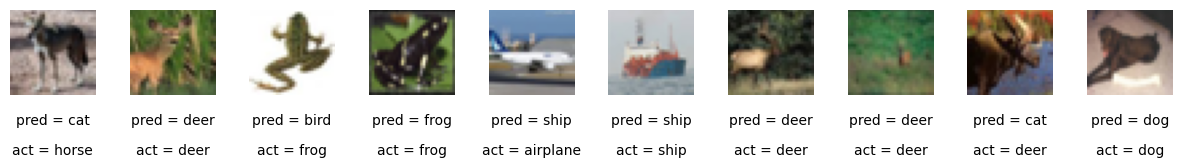

In [16]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)



## Improving results with a CNN


In [17]:



input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10, 
    kernel_size = (4,4), 
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20, 
    kernel_size = (3,3), 
    strides = 2, 
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)




In [18]:



model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


## Batch Normalization

Just like we normalized the inputs at the beginning, it has been found that normalizing outputs from one layer to the next as the model is learning is a good idea. BatchNormalization() does that. It calculates the mean and standard deviation for the given batch and normalizes. 



## A deeper CNN architecture


In [19]:

input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)


In [20]:


model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## Train

In [21]:


opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [22]:


model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)



Epoch 1/10
1563/1563 [==============================] - 158s 100ms/step - loss: 1.5510 - accuracy: 0.4552 - val_loss: 1.2158 - val_accuracy: 0.5697
Epoch 2/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.1434 - accuracy: 0.5962 - val_loss: 1.0559 - val_accuracy: 0.6221
Epoch 3/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9888 - accuracy: 0.6544 - val_loss: 1.0489 - val_accuracy: 0.6277
Epoch 4/10
1563/1563 [==============================] - 157s 100ms/step - loss: 0.9087 - accuracy: 0.6827 - val_loss: 0.9587 - val_accuracy: 0.6639
Epoch 5/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8432 - accuracy: 0.7063 - val_loss: 0.8520 - val_accuracy: 0.7040
Epoch 6/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7951 - accuracy: 0.7234 - val_loss: 0.8569 - val_accuracy: 0.6987
Epoch 7/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.7574 - accuracy: 0.7349 - val_los

## The Weights of a layer

In [23]:
model.layers[5].get_weights()

[array([0.8679576 , 1.1897436 , 0.8469721 , 1.1182715 , 0.87136364,
        0.9191906 , 0.9715213 , 0.8664193 , 1.1163417 , 0.8610825 ,
        0.9739354 , 0.9644553 , 0.87969583, 0.9480703 , 0.88741577,
        1.1949252 , 0.86840093, 1.1075106 , 1.0161568 , 1.1687982 ,
        0.8464442 , 1.0200981 , 0.93898654, 1.1748387 , 0.8770724 ,
        1.0216194 , 1.0611864 , 0.7763637 , 1.0788007 , 1.0121912 ,
        1.1655835 , 0.88762295], dtype=float32),
 array([-0.02764057, -0.19888271, -0.13916816, -0.09685262, -0.15840359,
        -0.10020438, -0.13026424,  0.0688009 , -0.19374883, -0.26543817,
        -0.1817759 , -0.25381324, -0.29900306, -0.06666952, -0.20619032,
        -0.19489786, -0.06262284, -0.09209742, -0.09873067, -0.11155129,
        -0.02813714, -0.08690885, -0.05914269, -0.17360519, -0.18163559,
        -0.14834996, -0.16574627, -0.22018945, -0.06649308, -0.11338983,
        -0.05851622, -0.12484399], dtype=float32),
 array([-0.7039243 , -0.30148768, -0.41852155,  0.0319

## Evaluate

In [24]:


model.evaluate(x_test, y_test, batch_size=1000)



10/10 [==============================] - 3s 326ms/step - loss: 0.8654 - accuracy: 0.7001


[0.8654260635375977, 0.7001000046730042]

In [25]:


CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)




313/313 [==============================] - 8s 26ms/step


In [26]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

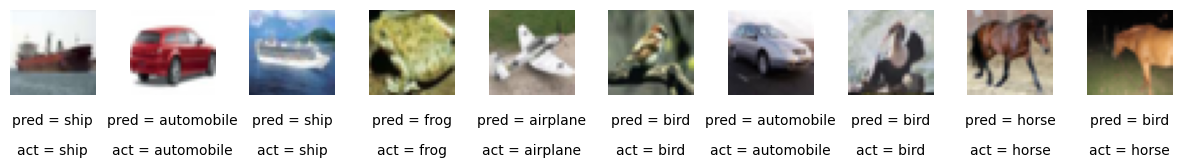

In [27]:



import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)




## Pretrained Models

History of pretrained CNNs: https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

Pre-trained models: https://keras.io/api/applications/


In [79]:

from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50


In [69]:

model = keras.models.Sequential()

model.add(    VGG16(weights='imagenet')      )

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


## Initialize VGG

In [70]:

VGG = VGG16(    include_top=False, input_shape=(32, 32, 3)     )


## Freezing layers

If similar images you can freeze network. Otherwise, common practive is to freeze top layers.

In [71]:

## for layer in VGG.layers[:10]                  ## freezing top layers


for layer in VGG.layers:
    layer.trainable = False
    

for layer in VGG.layers:
    sp = '        '[len(layer.name)-9:]
    print(layer.name, sp, layer.trainable)




input_16   False
block1_conv1       False
block1_conv2       False
block1_pool        False
block2_conv1       False
block2_conv2       False
block2_pool        False
block3_conv1       False
block3_conv2       False
block3_conv3       False
block3_pool        False
block4_conv1       False
block4_conv2       False
block4_conv3       False
block4_pool        False
block5_conv1       False
block5_conv2       False
block5_conv3       False
block5_pool        False


## Build architecture

In [72]:



model = keras.models.Sequential()

model.add(   VGG   )

model.add(   Flatten()   )

model.add(   Dense(units=NUM_CLASSES, activation='softmax')   )

model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [73]:


opt = Adam(lr=0.001)    ## 0.0005
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [74]:


model.fit(x_train, 
          y_train, 
          batch_size=128,    # 32 
          epochs=4, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)


Epoch 1/4
391/391 [==============================] - 298s 760ms/step - loss: 1.7093 - accuracy: 0.4177 - val_loss: 1.4939 - val_accuracy: 0.4910
Epoch 2/4
391/391 [==============================] - 292s 748ms/step - loss: 1.4165 - accuracy: 0.5211 - val_loss: 1.3872 - val_accuracy: 0.5246
Epoch 3/4
391/391 [==============================] - 292s 747ms/step - loss: 1.3363 - accuracy: 0.5469 - val_loss: 1.3363 - val_accuracy: 0.5412
Epoch 4/4
391/391 [==============================] - 290s 741ms/step - loss: 1.2912 - accuracy: 0.5603 - val_loss: 1.3039 - val_accuracy: 0.5500


In [ ]:


model.evaluate(x_test, y_test, batch_size=1000)


